In [1]:
%cd /home/mkallel/explo/

import logging
import logging.config
import os
from multiprocessing import Pool
from warnings import simplefilter

import gpytorch
import numpy as np
import torch
import threading
import wandb
from src.config import get_configs
from src.helpers import setup_experiment
from src.trainer import Trainer
import itertools


logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()

simplefilter(action='ignore', category=DeprecationWarning)
#os.environ["WANDB_API_KEY"]="28996bd59f1ba2c5a8c3f2cc23d8673c327ae230"
os.environ["WANDB_API_KEY"]="baf5048ab2de89a0b2cea751b1b28ff2bfa4c782"

def run(seed,
        env_name,
        kernel_name,
        manipulate_state,
        norm_grad,
        conf_grad,
        advantage_mean,
        adaptive_lr,
        lr ):

        #env_name = "CartPole-v1" ## Action kernel + State_norm looks very well for cartpole
        #env_name = "Swimmer-v4" ##  State_norm stabilizes training 
        #env_name = "Hopper-v2"
        #env_name = "HalfCheetah-v2"        
        #env_name = "Walker2d-v3"

        project_name = env_name+("RBFSTATE + CONF")
        run_name =  kernel_name+"_lr="+str(lr) +"_"+str(1 *manipulate_state)+ str(1 *norm_grad) + str(1 *conf_grad) + str(1 *advantage_mean)+str(1 *adaptive_lr) +"_"+ str(seed)
        env_config,policy_config,likelihood_config,kernel_config,mean_config,optimizer_config,trainer_config = get_configs(env_name,kernel_name,
        use_ard=True,manipulate_state=manipulate_state,
        conf_grad=conf_grad,norm_grad=norm_grad,advantage_mean=advantage_mean,adaptive_lr=adaptive_lr,lr=lr,
        wandb_logger=False,project_name=project_name,run_name=run_name)

        trainer_config["n_steps"]=500

        model,objective_env,optimizer = setup_experiment(env_config,mean_config,kernel_config,likelihood_config,policy_config,optimizer_config,
                                        seed=seed)

        trainer = Trainer(model,objective_env,optimizer,**trainer_config)
        trainer.run()

        return model,objective_env,optimizer



if __name__ == '__main__':

        
        wandb.require("service")
        wandb.setup()  

        env_name = ["Hopper-v2"]
        #env_name = ["CartPole-v1"]
        kernel_name = ["rbfstate"]
        manipulate_state = [False]
        norm_grad = [True]
        conf_grad = [True] ##run this for rbf
        advantage_mean = [True]
        adaptive_lr = [False]
        learning_rate = 0.1 if kernel_name == ["rbfstate"] else 0.5
        lr = [learning_rate]

        for config in itertools.product(*[env_name,kernel_name,manipulate_state,norm_grad,conf_grad,advantage_mean,adaptive_lr,lr]):

        
                model,objective_env,optimizer = run(*(0,*config))



/home/mkallel/explo


/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MathLog.src.helpers : WARNING : MLP dimensions : [11, 3]
MLPPPPPPPPP SETUP 36
MLP LEEEEEN 36
 Gibo will use 48 last points to fit GP and 8 info samples
fixing seed to  0


/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/torch/autograd/__init__.py:275: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/gpytorch/lazy/lazy_tensor.py:1741: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATe

0.2777777777777778
MLL : -20.103290557861328
batch_mean 0.039930202066898346 batch_max 0.14682024717330933
0.3055555555555556
MLL : -3.292067766189575
batch_mean 0.03002583049237728 batch_max 0.14682024717330933


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : -1.2843297719955444
batch_mean 0.033804502338171005 batch_max 0.14682024717330933


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : -0.6065031290054321
batch_mean 0.031635455787181854 batch_max 0.14682024717330933


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : -0.24442805349826813
batch_mean 0.033409785479307175 batch_max 0.14682024717330933


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : -0.1463300585746765
batch_mean 0.0420619361102581 batch_max 0.408189594745636


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : -0.25480201840400696
batch_mean 0.04037928581237793 batch_max 0.408189594745636
1.0
MLL : 0.014375686645507812
batch_mean 0.043486710637807846 batch_max 0.408189594745636
1.0
MLL : 0.16045896708965302
batch_mean 0.04529344290494919 batch_max 0.408189594745636


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.08253737539052963
batch_mean 0.047244373708963394 batch_max 0.408189594745636
1.0
MLL : 0.06877953559160233
batch_mean 0.048065781593322754 batch_max 0.408189594745636


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.19052383303642273
batch_mean 0.04099279269576073 batch_max 0.12432477623224258
0.6944444444444444
MLL : 0.3457251191139221
batch_mean 0.040005337446928024 batch_max 0.12432477623224258


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.4415016174316406
batch_mean 0.03685365244746208 batch_max 0.12432477623224258
0.9722222222222222
MLL : 0.3929441273212433
batch_mean 0.03526994213461876 batch_max 0.12432477623224258


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.47492995858192444
batch_mean 0.03202572837471962 batch_max 0.12432477623224258
0.9444444444444444
MLL : 0.5238561630249023
batch_mean 0.027890274301171303 batch_max 0.12432477623224258
0.8888888888888888
MLL : 0.5464755296707153
batch_mean 0.024392442777752876 batch_max 0.12432477623224258


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.5932796597480774
batch_mean 0.023058105260133743 batch_max 0.06466340273618698


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.7360953688621521
batch_mean 0.023017751052975655 batch_max 0.061229512095451355


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.8649663925170898
batch_mean 0.02299673855304718 batch_max 0.061229512095451355


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9077665209770203
batch_mean 0.022702259942889214 batch_max 0.061229512095451355


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9452227354049683
batch_mean 0.021648403257131577 batch_max 0.061229512095451355


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9739073514938354
batch_mean 0.020882610231637955 batch_max 0.061229512095451355
0.9722222222222222
MLL : 0.957809567451477
batch_mean 0.01929895579814911 batch_max 0.03834684193134308


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9578628540039062
batch_mean 0.018595274537801743 batch_max 0.03834684193134308
0.9722222222222222
MLL : 0.9669196009635925
batch_mean 0.018492748960852623 batch_max 0.04996092990040779
0.9166666666666666
MLL : 0.9776085615158081
batch_mean 0.01820194721221924 batch_max 0.04996092990040779
0.9444444444444444
MLL : 0.9818560481071472
batch_mean 0.018962159752845764 batch_max 0.04996092990040779


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9681423902511597
batch_mean 0.019796157255768776 batch_max 0.04996092990040779


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9881802797317505
batch_mean 0.01988876238465309 batch_max 0.04996092990040779
0.8611111111111112
MLL : 0.9916548132896423
batch_mean 0.019962945953011513 batch_max 0.04996092990040779


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9934868216514587
batch_mean 0.01957283541560173 batch_max 0.03577344864606857


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9931196570396423
batch_mean 0.019353551790118217 batch_max 0.03328283131122589


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 1.019368290901184
batch_mean 0.019038546830415726 batch_max 0.03150196745991707


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 1.0178719758987427
batch_mean 0.018727252259850502 batch_max 0.030627192929387093


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 1.0204118490219116
batch_mean 0.018431663513183594 batch_max 0.0290619395673275
0.8333333333333334
MLL : 1.0150549411773682
batch_mean 0.017226463183760643 batch_max 0.025694821029901505
0.8611111111111112
MLL : 0.9856705069541931
batch_mean 0.016122817993164062 batch_max 0.025694821029901505


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 1.0285385847091675
batch_mean 0.01598702371120453 batch_max 0.025694821029901505


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9746924638748169
batch_mean 0.015952175483107567 batch_max 0.025694821029901505


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.027777777777777776
MLL : 0.9866871237754822
batch_mean 0.015867818146944046 batch_max 0.025694821029901505
0.7777777777777778
MLL : 0.9790881276130676
batch_mean 0.01583249494433403 batch_max 0.025694821029901505


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.991020679473877
batch_mean 0.016220809891819954 batch_max 0.03192597255110741


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9713351130485535
batch_mean 0.016216887161135674 batch_max 0.03192597255110741


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9949347376823425
batch_mean 0.015810731798410416 batch_max 0.03192597255110741


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.8916455507278442
batch_mean 0.015611286275088787 batch_max 0.03192597255110741


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.7624477744102478
batch_mean 0.015481189824640751 batch_max 0.03192597255110741
0.7777777777777778
MLL : 0.8897827863693237
batch_mean 0.014867468737065792 batch_max 0.03192597255110741


/home/mkallel/explo/src/optimizers/helpers.py:75: RuntimeWarning: invalid value encountered in sqrt
  D_sqrt = np.diag(np.sqrt(1/eigvals))
/home/mkallel/miniconda3/envs/bopt/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.0
MLL : 0.9658628106117249
batch_mean 0.014602716080844402 batch_max 0.03192597255110741


In [2]:
# PATH = "/home/mkallel/explo/models/Swimmer"
# dict = model.state_dict()
# dict.update({
#     "optimizer":optimizer,
#     #"objective_env":objective_env,
#     })
# torch.save(dict,PATH)

Generating data
Done generating data
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
matplotlib.legend : WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


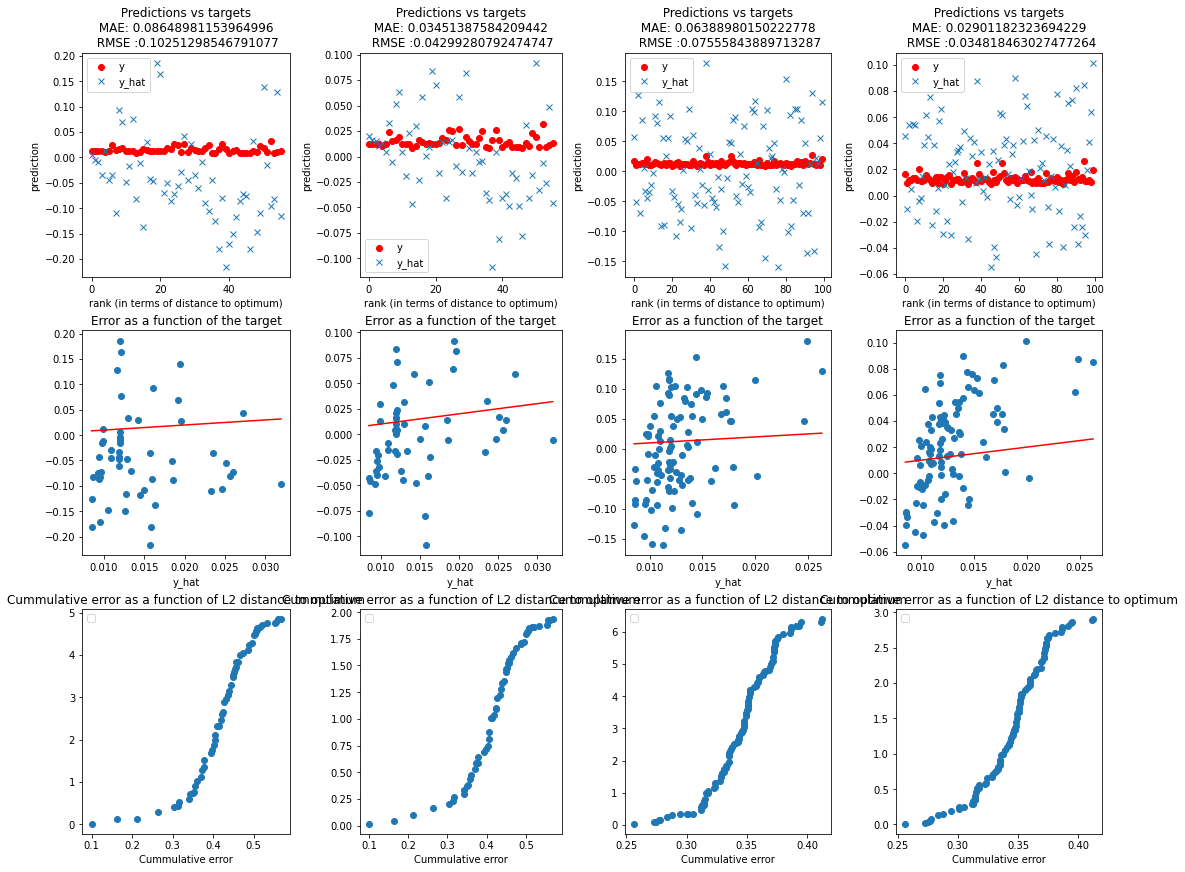

In [3]:
import pickle
import random

import botorch
import gpytorch
import matplotlib.pyplot as plt
import torch
from botorch.fit import fit_gpytorch_model
from gpytorch.mlls import ExactMarginalLogLikelihood
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split


##fix random seed
random.seed(0)
torch.manual_seed(0)

class Tester:
    
    def __init__(self,model,objective_env,local_opt,
                 delta=0.1,n_test=100,n_episodes_test=2,
                 ):
        
        
        self.__dict__.update(locals())
        
        
        

       
    def generate_data(self,n_test,n_episodes_test):
        
        objective_env,delta= self.objective_env,self.delta
        
        
        print(f'Generating data')
        
        
        bounds = torch.tensor([[-delta], [delta]]) + self.local_opt
        U = torch.distributions.Uniform(bounds[0],bounds[1])
        test_x = U.sample(sample_shape=[n_test])
        test_y = [objective_env(x.reshape(1,-1),n_episodes_test)[0] for x in test_x] ## run test points multiple times to get real value

        print(f'Done generating data')

        return test_x,torch.tensor(test_y)
        
    
  
  
    def plot(self,x,y,y_hat,local_x,title,
             subfigure=None):
    
        
        ### arrange points by l2 distance to optimum
        dist = torch.linalg.norm(x-local_x,dim=1)
        idx = torch.argsort(dist)
 
        y = y[idx]
        y_hat = y_hat[idx]
        x_plot = range(len(y))
        
        if subfigure is None:
            fig,axs = plt.subplots(3,figsize=(5,12))

        else :
            axs = subfigure.subplots(3)
            
        axs[0].scatter(x_plot,y,label="y",color="red")
        axs[0].errorbar(x_plot,y_hat,label="y_hat",fmt="x")
        axs[0].title.set_text(f' Predictions vs targets \n MAE: {mae(y,y_hat)} \n RMSE :{mse(y,y_hat,squared=False)}')
        axs[0].set_xlabel("rank (in terms of distance to optimum)")
        axs[0].set_ylabel("prediction")
        
        axs[0].legend()
        
        idx2 = torch.argsort(y)
        axs[1].scatter(y[idx2],y_hat[idx2],label="error")
        axs[1].plot(y[idx2],y[idx2],color="red")
        axs[1].title.set_text("Error as a function of the target")
        axs[1].set_xlabel("y")
        axs[1].set_xlabel("y_hat")
        
        error = torch.abs(y[idx]-y_hat[idx])
        axs[2].scatter(dist[idx],torch.cumsum(error,dim=0))
        axs[2].set_title("Cummulative error as a function of L2 distance to optimum")
        axs[2].set_xlabel("||x - x_opt||")
        axs[2].set_xlabel("Cummulative error")
        
        plt.legend()
        
        
    
    def get_mll(self,model,x,y):
        
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihood, model)
        output = model(x)
        marginal_likelihood = mll(output,y)
        
        return marginal_likelihood.item()
        
    def predict(self,model,x):
        
        model.eval()
        model.likelihood.eval()
        
        with torch.no_grad():

            pred = model.likelihood(model(x))
        
        lower, upper = pred.confidence_region()   
        y_hat = pred.mean  
        
        return y_hat,lower,upper
    
 
    def run(self):
        
        self.__dict__.update(locals()) ##save args to self

        train_x,train_y =  model.train_inputs[0],model.train_targets
        test_x,test_y = self.generate_data(self.n_test,self.n_episodes_test)
        
        train_mean = model.mean_module(train_x).detach().cpu().numpy()
        test_mean = model.mean_module(test_x).detach().cpu().numpy()

        train_pred = self.predict(model,train_x)
        test_pred  = self.predict(model,test_x)
        
        train_mll = self.get_mll(model,train_x,train_y)
        test_mll = self.get_mll(model,test_x,test_y)
        
        
        #fig = plt.figure(constrained_layout=True,figsize=(8,12))
        fig = plt.figure(constrained_layout=True,figsize=(15,12))
        subfigures = fig.subfigures(1,4)
        ### train plots
        
        y_hat,lower,upper = train_pred
        self.plot(train_x,train_y,train_mean,self.local_opt,"train_mean",
                  subfigures[0])
        
        self.plot(train_x,train_y,y_hat,self.local_opt,"train_gp",
                  subfigures[1])
        
        ### test plots
        
        y_hat,lower,upper = test_pred
        self.plot(test_x,test_y,test_mean,self.local_opt,"test_mean",
                  subfigures[2])
        
        self.plot(test_x,test_y,y_hat,self.local_opt,"test_gp",
                  subfigures[3])

tester = Tester(model,objective_env,optimizer.theta_i)
tester.run()

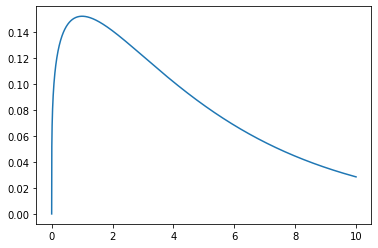

In [4]:
import scipy.stats as stats 
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.25
beta = 0.25
x = np.linspace (0, 10, 2000) 
y1 = stats.gamma.pdf(x, a=alpha, scale=1/beta)
plt.plot(x,y1)